In [2]:
import numpy as np
import matplotlib.pyplot as plt
import GPy
import seaborn as sns


<Axes: >

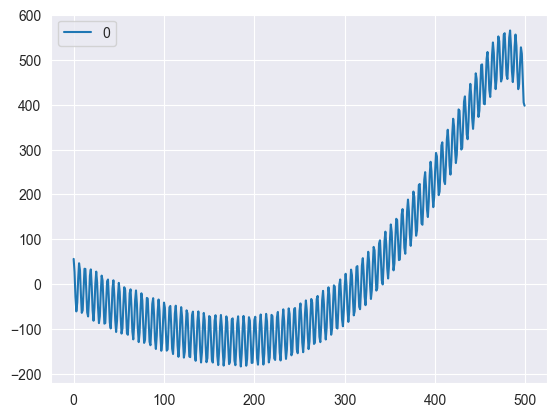

In [116]:
# Генерация данных
np.random.seed(42)
X = np.linspace(0, 500, 500)[:, None]
Y = -np.log(X+1)+ 60*np.cos(X) - np.log(np.sinh(X+1)) + 0.00001*X**3 - 4*np.sin(X-24) - 2*np.exp((X-400)/20)
sns.lineplot(Y)

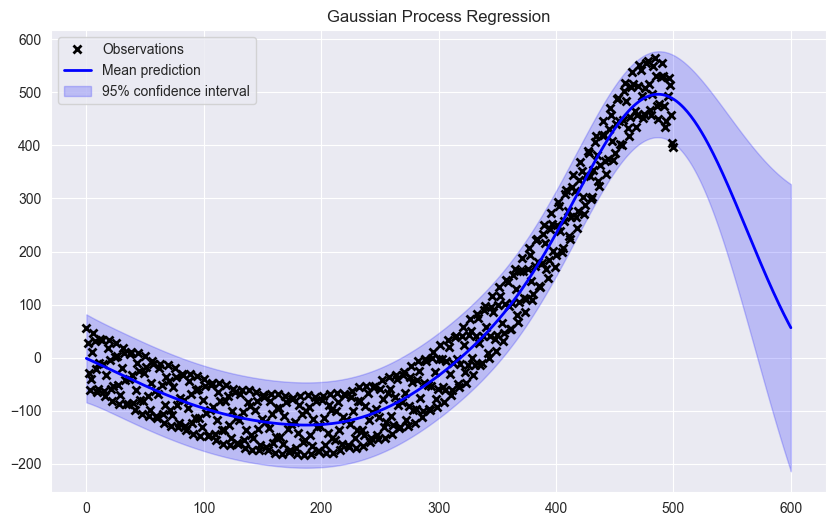

In [119]:
# Определение ковариационной функции (ядра)
kernel = GPy.kern.RBF(input_dim=1, variance=1.0, lengthscale=1.0)

# Создание модели гауссовских процессов
model = GPy.models.GPRegression(X, Y, kernel)

# Обучение модели
model.optimize(messages=True)
# Предсказание на новых данных
X_new = np.linspace(0, 600, 600)[:, None]
mean, variance = model.predict(X_new)

# Визуализация результатов
plt.figure(figsize=(10, 6))
plt.plot(X, Y, 'kx', mew=2, label='Observations')
plt.plot(X_new, mean, 'b', lw=2, label='Mean prediction')
plt.fill_between(X_new.flatten(), 
                 (mean - 1.96 * np.sqrt(variance)).flatten(), 
                 (mean + 1.96 * np.sqrt(variance)).flatten(), 
                 color='blue', alpha=0.2, label='95% confidence interval')
plt.title('Gaussian Process Regression')
plt.legend()
plt.show()

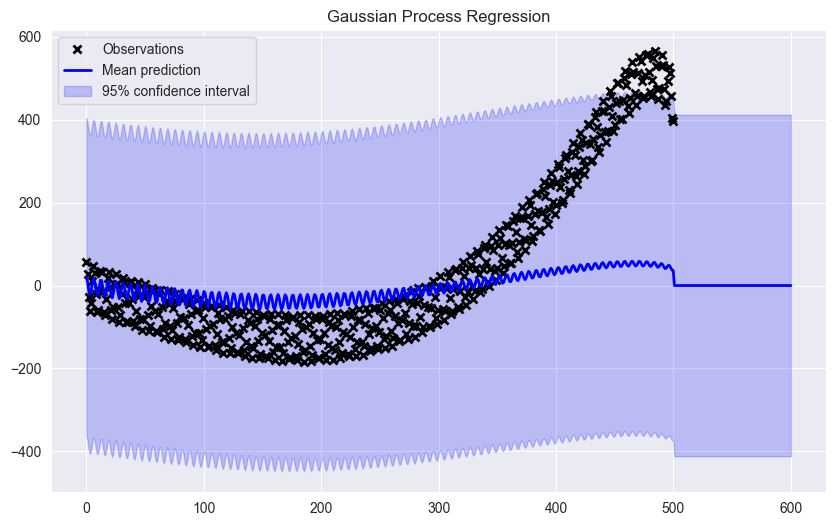

In [120]:
# Определение ковариационной функции (ядра)
kernel = GPy.kern.RBF(input_dim=1, variance=10, lengthscale=0.1)

# Создание модели гауссовских процессов
model = GPy.models.GPRegression(X, Y, kernel)

# Обучение модели
model.optimize(messages=True)
# Предсказание на новых данных
X_new = np.linspace(0, 600, 600)[:, None]
mean, variance = model.predict(X_new)

# Визуализация результатов
plt.figure(figsize=(10, 6))
plt.plot(X, Y, 'kx', mew=2, label='Observations')
plt.plot(X_new, mean, 'b', lw=2, label='Mean prediction')
plt.fill_between(X_new.flatten(), 
                 (mean - 1.96 * np.sqrt(variance)).flatten(), 
                 (mean + 1.96 * np.sqrt(variance)).flatten(), 
                 color='blue', alpha=0.2, label='95% confidence interval')
plt.title('Gaussian Process Regression')
plt.legend()
plt.show()

In [125]:
lin = GPy.kern.Linear(input_dim=1)
        
K = lin
bias = GPy.kern.Bias(input_dim=1)
K = K + bias

rbf = GPy.kern.RBF(input_dim=1)
    
K = K + rbf


periodic = GPy.kern.StdPeriodic(input_dim=1)
periodic.period.fix(24) # period is set to 1 year by default

K = K + periodic


#now initiliazes the  (Q-1) SM components. Each component is rfb*cos, where
#the variance of the cos is set to 1.
for ii in range(0, 2):
    cos =  GPy.kern.Cosine(input_dim=1)
    cos.variance.fix(1)
    rbf =  GPy.kern.RBF(input_dim=1) #input dim, variance, lenghtscale
    K = K + cos * rbf

Optimization restart 1/10, f = 831.7823298419294
Optimization restart 2/10, f = -1518.1486462210148
Optimization restart 3/10, f = 1533.427797061085
Optimization restart 4/10, f = 2627.4011780768697
Optimization restart 5/10, f = 14446.884612504922
Optimization restart 6/10, f = 2014.135156789093
Optimization restart 7/10, f = 1733.8201305301545
Optimization restart 8/10, f = 1731.9066875829203
Optimization restart 9/10, f = 2626.5684856247894
Optimization restart 10/10, f = -1157.8194137863459


 C:\Users\vitya\AppData\Local\Temp\ipykernel_10888\568816561.py:13: RuntimeWarning:invalid value encountered in sqrt
 C:\Users\vitya\AppData\Local\Temp\ipykernel_10888\568816561.py:14: RuntimeWarning:invalid value encountered in sqrt


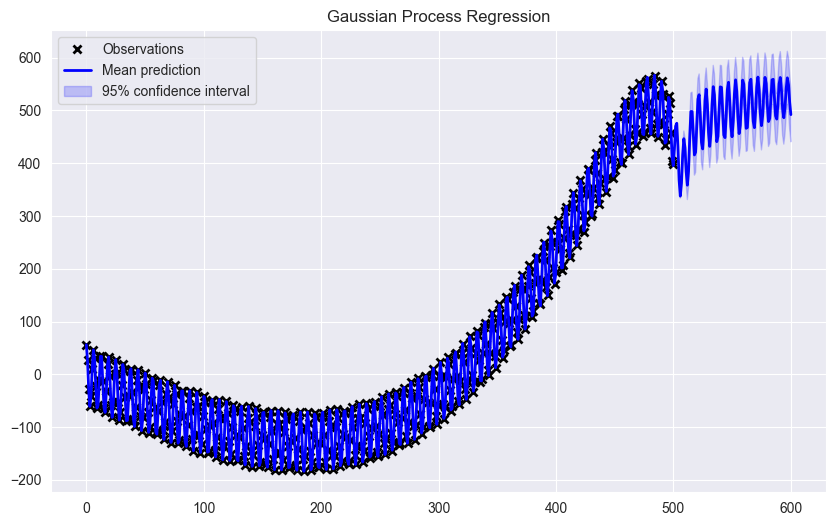

In [126]:
model = GPy.models.GPRegression(X, Y, K)

model.optimize_restarts(10, robust=True)
# Предсказание на новых данных
X_new = np.linspace(0, 600, 600)[:, None]
mean, variance = model.predict(X_new)

# Визуализация результатов
plt.figure(figsize=(10, 6))
plt.plot(X, Y, 'kx', mew=2, label='Observations')
plt.plot(X_new, mean, 'b', lw=2, label='Mean prediction')
plt.fill_between(X_new.flatten(), 
                 (mean - 1.96 * np.sqrt(variance)).flatten(), 
                 (mean + 1.96 * np.sqrt(variance)).flatten(), 
                 color='blue', alpha=0.2, label='95% confidence interval')
plt.title('Gaussian Process Regression')
plt.legend()
plt.show()